In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from functools import reduce  
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics

In [2]:
def get_sim_data(p, n, min_cor, max_cor, true_betas): # generate simulated data
    
    sd_vec = np.ones(p) 
    mean = np.zeros(p)
    cor_matrix = np.zeros((p,p))

    correlation = np.random.uniform(min_cor, max_cor, int(p * (p - 1) / 2))
    cor_matrix[np.triu_indices(p, 1)] = correlation
    cor_matrix[np.tril_indices(p, -1)] = cor_matrix.T[np.tril_indices(p, -1)]
    np.fill_diagonal(cor_matrix, 1)


    D = np.diag(sd_vec)
    sigma = D.dot(cor_matrix).dot(D)

    X = np.random.multivariate_normal(mean, sigma, n)
    eps = np.random.normal(0, 1, n)
    
    y_true = X.dot(true_betas)
    y_true = pd.Series(y_true, name = 'y_true')

    y_noise = y_true + eps 
    y_noise = pd.Series(y_noise, name = 'y_noise')
    
    column_names = []
    
    for value in range(1, p + 1): 
        
        column = f"X_{value}"
        column_names.append(column)
        
    
    X = pd.DataFrame(X, columns = column_names)
    
    df = pd.concat([y_noise, X], axis = 1)
    
    return y_true, y_noise, X, df

In [52]:
alphas = np.logspace(-2,2,100)
alphas


array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05480231e-02, 7.74263683e-02, 8.49753436e-02,
       9.32603347e-02, 1.02353102e-01, 1.12332403e-01, 1.23284674e-01,
       1.35304777e-01, 1.48496826e-01, 1.62975083e-01, 1.78864953e-01,
       1.96304065e-01, 2.15443469e-01, 2.36448941e-01, 2.59502421e-01,
       2.84803587e-01, 3.12571585e-01, 3.43046929e-01, 3.76493581e-01,
       4.13201240e-01, 4.53487851e-01, 4.97702356e-01, 5.46227722e-01,
       5.99484250e-01, 6.57933225e-01, 7.22080902e-01, 7.92482898e-01,
       8.69749003e-01, 9.54548457e-01, 1.04761575e+00, 1.14975700e+00,
       1.26185688e+00, 1.38488637e+00, 1.51991108e+00, 1.66810054e+00,
      

In [69]:
np.random.seed(12)

n = 30
p = 35
min_cor = 0  # we have not included multicollinearity in our analysis yet.
max_cor = 0 
true_betas = np.repeat(5, p) 
iterations = 1000

y_true_train, y_noise_train, X_train, df_train = get_sim_data(p, n, min_cor, max_cor, true_betas) # get training data
alphas = np.logspace(-2,3,70)
store_mse = []
store_variance = []
store_bias_sq = []

for a in alphas: 
    

    store_predictions = []

    for i in range(iterations):

        y_true_test, y_noise_test, X_test, df_test = get_sim_data(p, n, min_cor, max_cor, true_betas) # get test data 

        ridge = Ridge(alpha=a).fit(X_train, y_noise_train)
        ridge_predict = ridge.predict(X_test)
        ridge_predict_select = ridge_predict[14]
        store_predictions.append(ridge_predict_select) 
    
    mse = np.sum((np.asarray(store_predictions) - y_true_train[14])**2) / iterations
    variance = np.mean((np.mean(store_predictions) - np.asarray(store_predictions))**2)
    bias_squared = (np.mean(store_predictions) - y_true_train[14])**2

    store_mse.append(mse)
    store_variance.append(variance)
    store_bias_sq.append(bias_squared)


store_biase_sq

[419.92544301447754,
 353.6117690520552,
 436.49711759930887,
 372.91994502582753,
 372.2033891499931,
 353.9807374332089,
 379.9284030552372,
 427.1670184706157,
 455.42794252458106,
 404.2340703682254,
 418.14613729244206,
 369.2810870265735,
 404.64606258104686,
 440.09193754723435,
 415.6981273853938,
 412.8372023643639,
 399.7079753212214,
 410.70728317119364,
 398.3809177605411,
 397.21646343714235,
 405.8717288648201,
 382.31263668243065,
 403.2509975003093,
 485.70661266202995,
 368.9711114313695,
 424.4312843749499,
 428.7315864912073,
 424.9667757741917,
 426.16104165582414,
 419.9121570645999,
 429.036055579393,
 435.01597904044127,
 434.76869073618883,
 415.8855681950864,
 445.56709845744007,
 506.1421242111704,
 536.1617219497949,
 505.54695724492916,
 532.0127823571996,
 492.4425303906114,
 552.0012783022579,
 546.6074582266164,
 537.9169533153967,
 553.0032411977664,
 574.6688264987747,
 579.137005307456,
 571.6348033879207,
 584.3160102403497,
 585.2743936305928,
 607.7

In [70]:
store_variance

[591.0066757374034,
 559.4594964332726,
 580.3750775602864,
 587.3695494338453,
 576.6114973444077,
 559.1483809490346,
 628.5004689453199,
 613.6102418130349,
 594.1533716809636,
 580.9042041980624,
 642.6068659539661,
 600.5161226979559,
 584.5543449280223,
 591.8594940297558,
 579.4540707762178,
 631.8886630332946,
 599.5248204690167,
 561.5807740611738,
 613.9875804183486,
 615.6546882812753,
 586.4750887730722,
 565.3330350970689,
 547.3212138804982,
 607.6009631505002,
 546.1765176870427,
 583.8845413191062,
 521.7334569695913,
 555.8967077453336,
 538.6567743370969,
 509.13251964169683,
 533.659750010838,
 491.22103007769584,
 500.8172986802313,
 446.64552145483424,
 451.5729691170843,
 442.07682560671225,
 416.54190879192737,
 411.8631923028434,
 412.03325789263056,
 375.58272714457735,
 362.93221659953394,
 338.8981617095783,
 289.81630789418426,
 271.3198893456579,
 240.2752498330031,
 245.63241351753538,
 182.56478925209763,
 163.09998786785667,
 147.01823725223716,
 122.236

In [71]:
np.asarray(store_bias_sq) + np.asarray(store_variance)

array([1010.93211875,  913.07126549, 1016.87219516,  960.28949446,
        948.81488649,  913.12911838, 1008.428872  , 1040.77726028,
       1049.58131421,  985.13827457, 1060.75300325,  969.79720972,
        989.20040751, 1031.95143158,  995.15219816, 1044.7258654 ,
        999.23279579,  972.28805723, 1012.36849818, 1012.87115172,
        992.34681764,  947.64567178,  950.57221138, 1093.30757581,
        915.14762912, 1008.31582569,  950.46504346,  980.86348352,
        964.81781599,  929.04467671,  962.69580559,  926.23700912,
        935.58598942,  862.53108965,  897.14006757,  948.21894982,
        952.70363074,  917.41014955,  944.04604025,  868.02525754,
        914.9334949 ,  885.50561994,  827.73326121,  824.32313054,
        814.94407633,  824.76941882,  754.19959264,  747.41599811,
        732.29263088,  729.94475267,  719.45278992,  716.27375195,
        726.84105497,  714.41834377,  700.41507385,  709.80078646,
        710.10689024,  721.2368304 ,  724.61549925,  719.97358

In [72]:
store_mse

[1010.9321187518808,
 913.0712654853277,
 1016.8721951595952,
 960.289494459673,
 948.8148864944008,
 913.1291183822434,
 1008.4288720005569,
 1040.7772602836505,
 1049.5813142055445,
 985.1382745662879,
 1060.7530032464083,
 969.7972097245295,
 989.2004075090691,
 1031.95143157699,
 995.1521981616115,
 1044.7258653976585,
 999.2327957902381,
 972.2880572323674,
 1012.3684981788896,
 1012.8711517184178,
 992.3468176378924,
 947.6456717794996,
 950.5722113808074,
 1093.30757581253,
 915.1476291184122,
 1008.3158256940561,
 950.4650434607986,
 980.8634835195255,
 964.8178159929209,
 929.0446767062969,
 962.6958055902312,
 926.2370091181372,
 935.5859894164201,
 862.5310896499208,
 897.1400675745243,
 948.2189498178828,
 952.7036307417225,
 917.4101495477723,
 944.0460402498302,
 868.0252575351888,
 914.933494901792,
 885.5056199361946,
 827.7332612095809,
 824.3231305434243,
 814.9440763317778,
 824.7694188249912,
 754.1995926400182,
 747.4159981082063,
 732.2926308828302,
 729.944752671

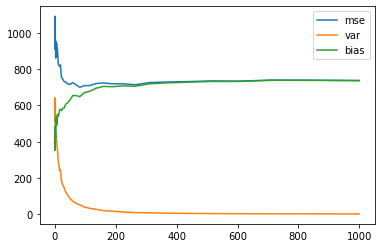

In [86]:
ax = plt.subplot(1,1,1)

mse = ax.plot(alphas, store_mse)
var = ax.plot(alphas, store_variance)
bias = ax.plot(alphas, store_bias_sq)
ax.legend(['mse', 'var', 'bias'])

In [87]:
min(store_mse)

700.415073851889

# Exercise Ends here. 

In [20]:
"""Computed MSE manually and using mean_squared_error function from scikit learn package. Also computed variance
and bia squared. Outcomes for mse make sense in that the mse falls due to decreasing varianance and then rises
due to increased bias. But bias and variance are much larger than mse values, and mse ≠ variance + bias squared.
Variance seems to decline as is expected for increase alpha, but again is much too high. Bias squared is however decrease
instead of increasing for higher alphas."""

alphas = np.array([0, 0.00000000000000000001, 0.0000000000000000001, 0.000000000000000001, 0.00000000000000001, 0.000000000000001, 0.000000000001, 0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.25, 0.3, 0.35, 0.5, 1, 2, 3, 4, 5, 6, 7, 8]) 



save_mse = []
save_mse_sci = []
save_var = []
save_var_trial = []
save_bias = []

for a in alphas: 
    ridge = Ridge(alpha=a).fit(X_train, y_true_train)
    ridge_predict = ridge.predict(X_test)

    squared_dist = (ridge_predict - y_noise_test)**2
    MSE = np.mean(squared_dist)
    save_mse.append(MSE)
    
    MSE_sci = metrics.mean_squared_error(ridge_predict, y_noise_test)
    save_mse_sci.append(MSE_sci)
    
    var_predicted_y = np.mean((np.mean(ridge_predict) - np.asarray(ridge_predict))**2)
    var_predicted_y_trial = np.sum((y_noise_test - np.mean(y_noise_test))**2) / 100


    save_var.append(var_predicted_y)
    save_var_trial.append(var_predicted_y_trial)
    
    bias_squared = (np.mean(ridge_predict - y_noise_test))**2
    save_bias.append(bias_squared)


/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

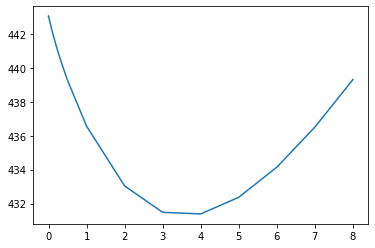

In [21]:
plt.plot(alphas, save_mse)

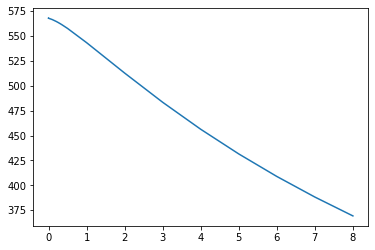

In [22]:
plt.plot(alphas, save_var)

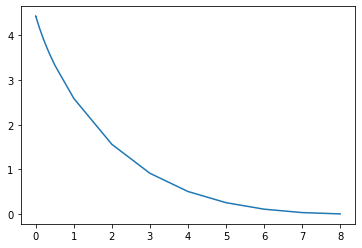

In [23]:
plt.plot(alphas, save_bias)

In [24]:
mse_trial = np.asarray(save_var_trial) + np.asarray(save_bias) # shows that mse ≠ variance + bias squared

In [25]:
mse_trial

array([276.46475054, 276.46475054, 276.46475054, 276.46475054,
       276.46475054, 276.46475054, 276.46475054, 276.46475051,
       276.46472119, 276.46445711, 276.46181853, 276.43565645,
       276.19346787, 275.95650648, 275.84759863, 275.74390634,
       275.64478622, 275.37017388, 274.62451598, 273.59785803,
       272.95020943, 272.54256899, 272.29250904, 272.14692793,
       272.0708526 , 272.04096835])

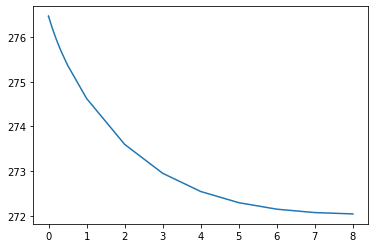

In [27]:
plt.plot(alphas, mse_trial) 

In [30]:
""" Tried using bias_variance_decomp function from mlxtend package. When I do this, I get mse, bias squared, and variance values
make sense, in the sense that mse = bias squared + variance. But then, the mse computed from this function 
doesn't correspond to the mses computed manually or from the mean_squared_error function in the scikit learn 
package."""

mse = []
variance = []
bias_sq = []
mse_scik = []



for a in alphas: 

    ridge = Ridge(alpha=a)
    fit = ridge.fit(X_train, y_noise_train)
    ridge_predict = fit.predict(X_test)

    error_reg_las, bias_reg_las, var_reg_las = bias_variance_decomp(ridge, X_train.values, y_noise_train.values, X_test.values, y_noise_test.values, loss='mse')
    mse_scikit = metrics.mean_squared_error(y_noise_test,ridge_predict)
    #print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_reg_las)
    #print('Avg Bias: %.3f' % bias_reg_las)
    #print('Avg Variance: %.3f' % var_reg_las)
    #print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_noise_test,ridge_predict))
    mse.append(error_reg_las)
    variance.append(var_reg_las)
    bias_sq.append(bias_reg_las)
    mse_scik.append(mse_scikit)



/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/emilyschwab/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving du

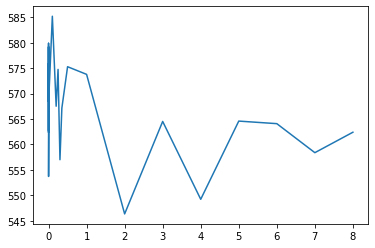

In [31]:
plt.plot(alphas, mse)

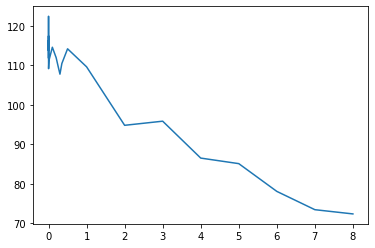

In [32]:
plt.plot(alphas, variance)

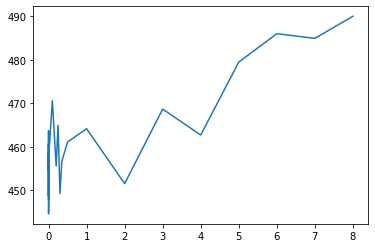

In [33]:
plt.plot(alphas, bias_sq)

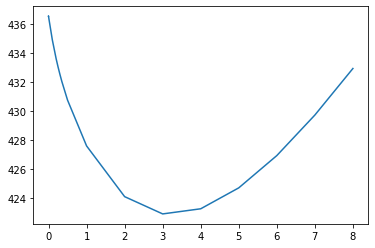

In [34]:
plt.plot(alphas, mse_scik)